In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [126]:
test = pd.read_csv("y_test_MNIST.csv")
# pred_Tpot = pd.read_csv("y_pred_MNIST_Tpot.csv")
pred_MLBox = pd.read_csv("y_pred_MNIST_MLBox.csv")
pred_H2O = pd.read_csv("y_pred_MNIST_H2O.csv")
pred_sklearn = pd.read_csv("y_pred_MNIST_Auto_sklearn.csv")

test = test.label
# pred_Tpot = pred_Tpot["0"]
pred_MLBox = round(pred_MLBox["label_predicted"])
pred_H2O = round(pred_H2O["predict"])
pred_sklearn = pred_sklearn["0"]

# test = label_binarize(test, classes=[0, 1, 2,3, 4, 5,6, 7, 7,9])
# pred_MLBox = label_binarize(pred_MLBox, classes=[0, 1, 2,3, 4, 5,6, 7, 7,9])
# pred_H2O = label_binarize(pred_H2O, classes=[0, 1, 2,3, 4, 5,6, 7, 7,9])
# pred_sklearn = label_binarize(pred_sklearn, classes=[0, 1, 2,3, 4, 5,6, 7, 7,9])

In [127]:
pred_H2O[pred_H2O==-1] = 0
pred_H2O[pred_H2O==10] = 0

pred_MLBox[pred_MLBox==-1] = 0
pred_MLBox[pred_MLBox==-2] = 0
pred_MLBox[pred_MLBox==10] = 0


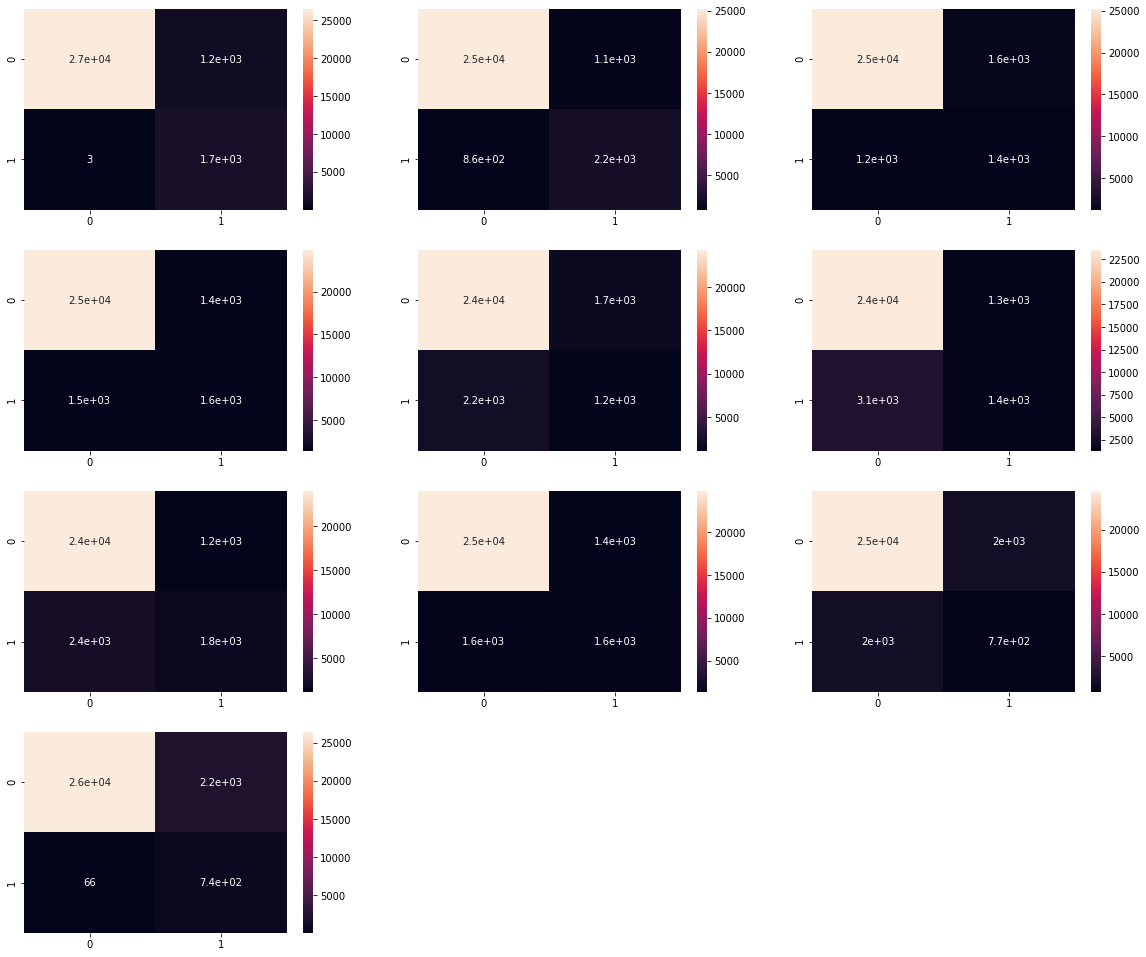

In [128]:
fig = plt.figure(figsize = [20,17])

multi = (multilabel_confusion_matrix(pred_H2O,test))
ax = []
for i in range(1,11):
    ax.append(fig.add_subplot(4,3,i))
i=0
for m in multi:
    sns.heatmap(data = m, ax= ax[i],annot=True)
    i+=1

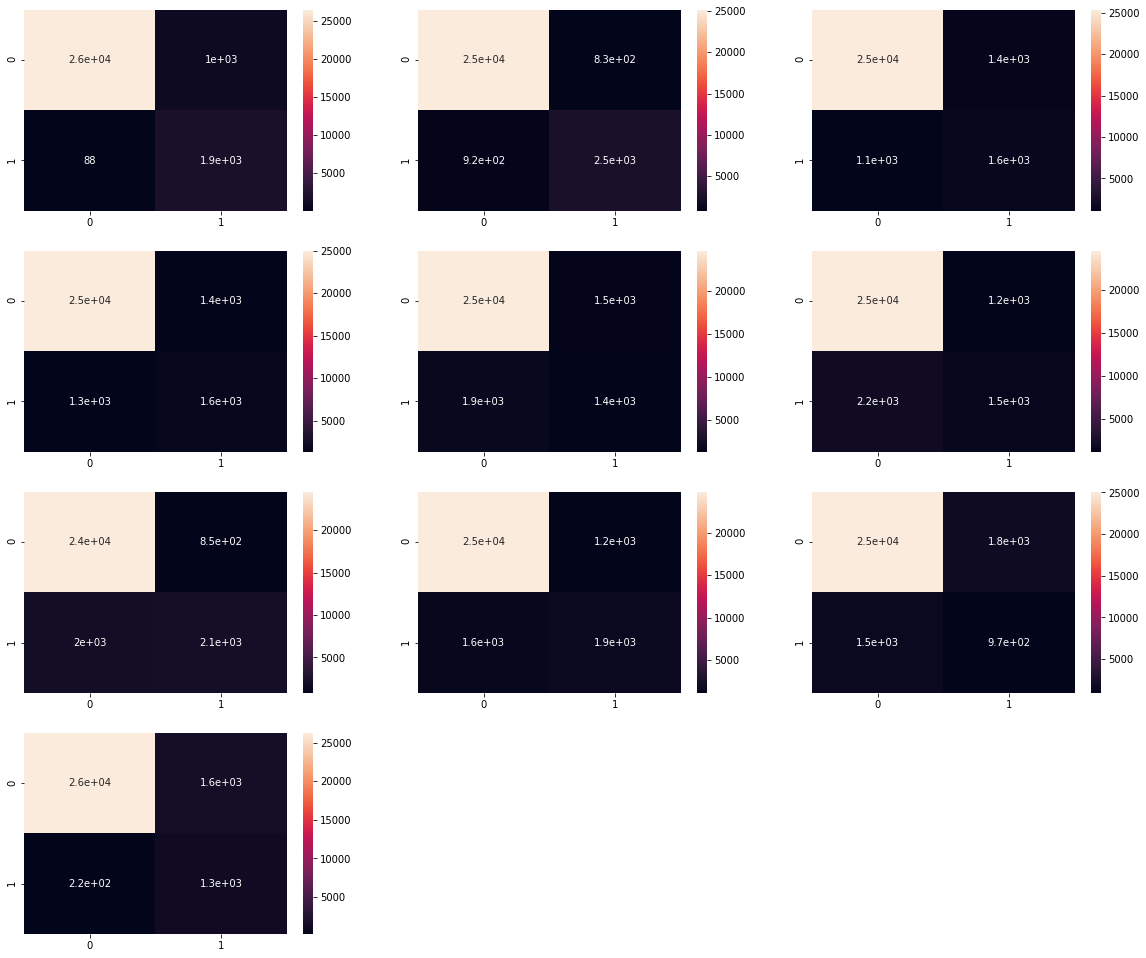

In [129]:
fig = plt.figure(figsize = [20,17])

multi = (multilabel_confusion_matrix(pred_MLBox,test))
ax = []
for i in range(1,11):
    ax.append(fig.add_subplot(4,3,i))
i=0
for m in multi:
    sns.heatmap(data = m, ax= ax[i],annot=True)
    i+=1

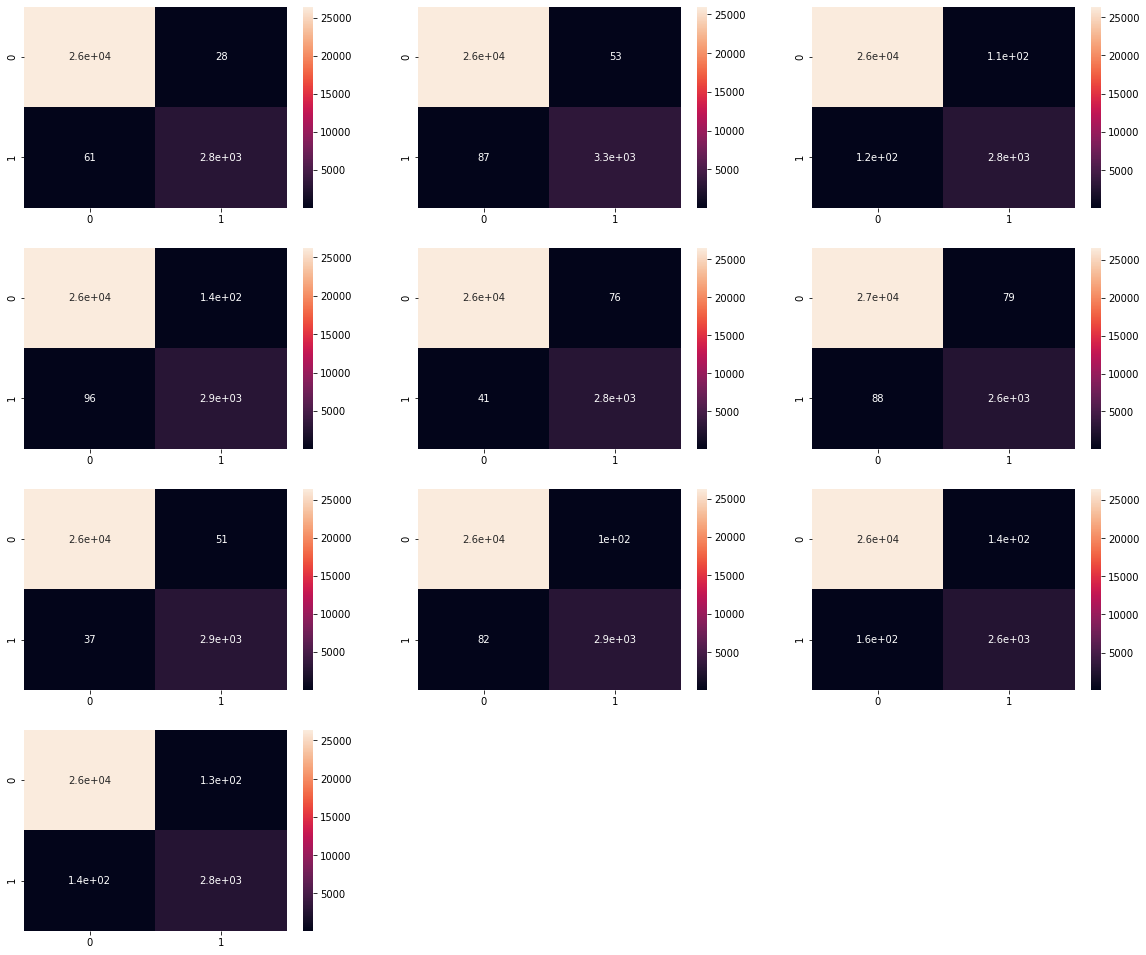

In [130]:
fig = plt.figure(figsize = [20,17])

multi = (multilabel_confusion_matrix(pred_sklearn,test))
ax = []
for i in range(1,11):
    ax.append(fig.add_subplot(4,3,i))
i=0
for m in multi:
    sns.heatmap(data = m, ax= ax[i],annot=True)
    i+=1

In [131]:
def dummies(data):
    data = pd.get_dummies(data)


    while (data.columns[0] not in (0,1)):
        print(data.columns[0])
        data = data.drop(data.columns[0],axis=1)
    while (data.columns[-1] not in (9,10)):
        print(data.columns[-1])
        data = data.drop(data.columns[-1],axis=1)
    return data
test = pd.get_dummies(test)
pred_H2O = dummies(pred_H2O)
pred_MLBox = dummies(pred_MLBox)
pred_sklearn = dummies(pred_sklearn)

In [132]:
# fpr,tpr,_=roc_curve(test,pred_Tpot)
# roc_auc = auc(fpr,tpr)

# plt.figure()
# lw=2
# plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC curve(area = %0.2f)' %roc_auc)
# plt.plot([0,1],[0,1],color='navy',lw=lw, linestyle='--')
# plt.xlim([0.0,1.0])
# plt.ylim([0.0,1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC curve IoT Botnet with Tpot')
# plt.show()

# cf_matrix = confusion_matrix(test, pred_Tpot)
# sns.heatmap(cf_matrix, annot=True)


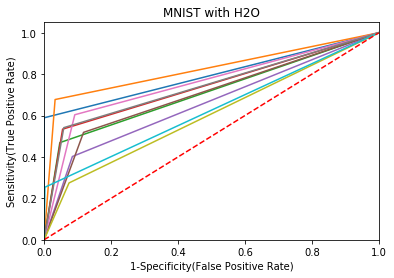

In [133]:
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': '0',
    'model': pred_H2O[pred_H2O.columns[0]],
    'test' : test[test.columns[0]]
},
{
    'label': '1',
    'model': pred_H2O[pred_H2O.columns[1]],
    'test' : test[test.columns[1]]
},
{
    'label': '2',
    'model': pred_H2O[pred_H2O.columns[2]],
    'test' : test[test.columns[2]]
},
{
    'label': '3',
    'model': pred_H2O[pred_H2O.columns[3]],
    'test' : test[test.columns[3]]
},
{
    'label': '4',
    'model': pred_H2O[pred_H2O.columns[4]],
    'test' : test[test.columns[4]]
},
{
    'label': '5',
    'model': pred_H2O[pred_H2O.columns[5]],
    'test' : test[test.columns[5]]
},
{
    'label': '6',
    'model': pred_H2O[pred_H2O.columns[6]],
    'test' : test[test.columns[6]]
},
{
    'label': '7',
    'model': pred_H2O[pred_H2O.columns[7]],
    'test' : test[test.columns[7]]
},
{
    'label': '8',
    'model': pred_H2O[pred_H2O.columns[8]],
    'test' : test[test.columns[8]],
},
{
    'label': '9',
    'model': pred_H2O[pred_H2O.columns[9]],
    'test' : test[test.columns[9]],
},
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    valid = m['test']
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(valid, model)
# Calculate Area under the curve to display on the plot
    auc = roc_auc_score(valid,model)
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('MNIST with H2O')
plt.show()   # Display

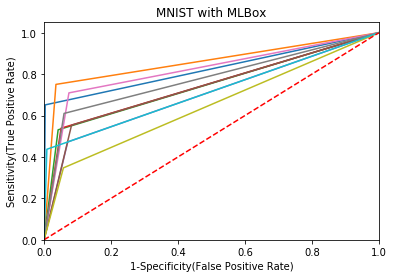

In [134]:

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': '0',
    'model': pred_MLBox[pred_MLBox.columns[0]],
    'test' : test[test.columns[0]]
},
{
    'label': '1',
    'model': pred_MLBox[pred_MLBox.columns[1]],
    'test' : test[test.columns[1]]
},
{
    'label': '2',
    'model': pred_MLBox[pred_MLBox.columns[2]],
    'test' : test[test.columns[2]]
},
{
    'label': '3',
    'model': pred_MLBox[pred_MLBox.columns[3]],
    'test' : test[test.columns[3]]
},
{
    'label': '4',
    'model': pred_MLBox[pred_MLBox.columns[4]],
    'test' : test[test.columns[4]]
},
{
    'label': '5',
    'model': pred_MLBox[pred_MLBox.columns[5]],
    'test' : test[test.columns[5]]
},
{
    'label': '6',
    'model': pred_MLBox[pred_MLBox.columns[6]],
    'test' : test[test.columns[6]]
},
{
    'label': '7',
    'model': pred_MLBox[pred_MLBox.columns[7]],
    'test' : test[test.columns[7]]
},
{
    'label': '8',
    'model': pred_MLBox[pred_MLBox.columns[8]],
    'test' : test[test.columns[8]],
},
{
    'label': '9',
    'model': pred_MLBox[pred_MLBox.columns[9]],
    'test' : test[test.columns[9]],
},
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    valid = m['test']
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(valid, model)
# Calculate Area under the curve to display on the plot
    auc = roc_auc_score(valid,model)
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('MNIST with MLBox')
plt.show()   # Display



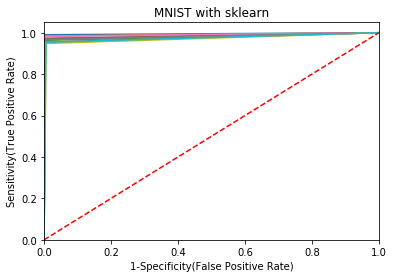

In [135]:

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': '0',
    'model': pred_sklearn[pred_sklearn.columns[0]],
    'test' : test[test.columns[0]]
},
{
    'label': '1',
    'model': pred_sklearn[pred_sklearn.columns[1]],
    'test' : test[test.columns[1]]
},
{
    'label': '2',
    'model': pred_sklearn[pred_sklearn.columns[2]],
    'test' : test[test.columns[2]]
},
{
    'label': '3',
    'model': pred_sklearn[pred_sklearn.columns[3]],
    'test' : test[test.columns[3]]
},
{
    'label': '4',
    'model': pred_sklearn[pred_sklearn.columns[4]],
    'test' : test[test.columns[4]]
},
{
    'label': '5',
    'model': pred_sklearn[pred_sklearn.columns[5]],
    'test' : test[test.columns[5]]
},
{
    'label': '6',
    'model': pred_sklearn[pred_sklearn.columns[6]],
    'test' : test[test.columns[6]]
},
{
    'label': '7',
    'model': pred_sklearn[pred_sklearn.columns[7]],
    'test' : test[test.columns[7]]
},
{
    'label': '8',
    'model': pred_sklearn[pred_sklearn.columns[8]],
    'test' : test[test.columns[8]],
},
{
    'label': '9',
    'model': pred_sklearn[pred_sklearn.columns[9]],
    'test' : test[test.columns[9]],
},
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    valid = m['test']
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(valid, model)
# Calculate Area under the curve to display on the plot
    auc = roc_auc_score(valid,model)
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('MNIST with sklearn')
plt.show()   # Display

